# Sheet 6 - Practical Exercise

In these exercises, we will work with data that we generate ourselves. Importing an external dataset will not be necessary.

First, run the code cell below to create and visualize two datasets with distinct shapes. (For simplicity, we just use a random state here)

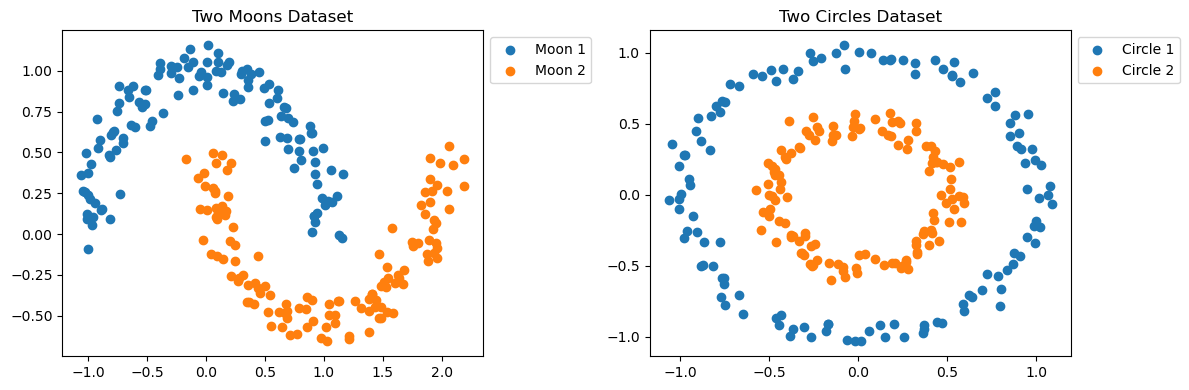

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles

# Generate datasets
X_moons, y_moons = make_moons(n_samples=250, noise=0.1, random_state=21)
X_circles, y_circles = make_circles(n_samples=250, noise=0.05, factor=0.5, random_state=21)

# Plot datasets
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_moons[y_moons == 0][:, 0], X_moons[y_moons == 0][:, 1], label='Moon 1')
plt.scatter(X_moons[y_moons == 1][:, 0], X_moons[y_moons == 1][:, 1], label='Moon 2')
plt.title('Two Moons Dataset')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.subplot(1, 2, 2)
plt.scatter(X_circles[y_circles == 0][:, 0], X_circles[y_circles == 0][:, 1], label='Circle 1')
plt.scatter(X_circles[y_circles == 1][:, 0], X_circles[y_circles == 1][:, 1], label='Circle 2')
plt.title('Two Circles Dataset')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


## Exercise 1

Apply the scikit-learn implementations of k-Means (k = 2) and DBSCAN ($\epsilon$ = 0.2, minPts = 5) to both datasets.

Visualize the results using your preferred visualization library.
How do you assess the cluster qualities?

What happens if you change $\epsilon$ to 0.3 when applying DBSCAN?

In [2]:
# Add code to import your preferred visualization library (if not matplotlib)

from sklearn.cluster import KMeans, DBSCAN

# Add code to apply k-Means and DBSCAN to the "Two Moons Dataset" and the "Two Circles Dataset"

# Add code to visualize the results

### Your answer:

## Exercise 2

Now calculate the silhouette coefficients for your results.

What do you notice compared to the previous visual interpretation of the results? 

Explain why (or why not) the silhouette coefficient seems suitable to quantify the quality of the clusters for our data sets.  

In [3]:
from sklearn.metrics import silhouette_score

# Add code to compute the silhouette coefficients

### Your answer: